[View in Colaboratory](https://colab.research.google.com/github/freesemt/stewart-acid-base-model/blob/master/notebooks/fig_17.ipynb)

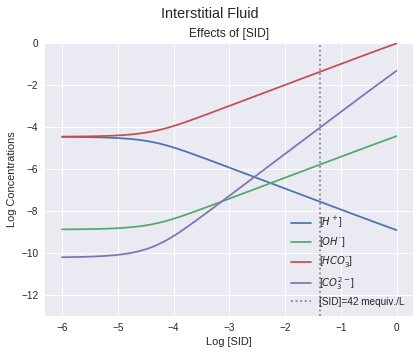

In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append('local_modules/OurUtils')
from StewartModel import Fh4, Kw, Kc, K3
MILI = 1e-3
KILO = 1e3

Atot = 0
SID = np.logspace(-6, 0, 100)
Log_SID = np.log10(SID)
pCO2 = 47

fig = plt.figure( figsize=(6, 5) )
fig.suptitle( "Interstitial Fluid" )

ax  = fig.add_subplot(111)
ax.set_title( "Effects of [SID]" )
ax.set_xlabel( "Log [SID]" )
ax.set_ylabel( "Log Concentrations" )
ax.set_ylim( -13, 0 )

H   = Fh4(SID, Atot, pCO2 )
ax.plot(Log_SID, np.log10(H), label='[$H^+$]')
OH  = Kw/H
ax.plot(Log_SID, np.log10(OH), label='[$OH^⁻$]')
HCO3 = Kc*pCO2/H
ax.plot(Log_SID, np.log10(HCO3), label='[$HCO_3^⁻$]')
CO3 = K3*HCO3/H
ax.plot(Log_SID, np.log10(CO3), label='[$CO_3^{2-}$]')

ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax)
x = np.log10(42*MILI)
ax.plot( [x, x], [ymin, ymax], ':', color='gray', label='[SID]=42 mequiv./L' )

ax.legend()
fig.tight_layout()
fig.subplots_adjust( top=0.88 )

plt.show()
